In [9]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 8, 7
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "normal"
plt.rcParams["font.size"] = 25
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams['axes.labelsize']=18
plt.rcParams['legend.fontsize']: 16
    
sns.set()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [10]:
bank = pd.read_csv('Churn_Modelling.csv')
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [11]:
### Dropping RowNumber & Surname Column (Don't help in predicting churn) and Inspecting Potential Duplicates in 'CustomerId' Before Dropping ###
bank = bank.drop(['RowNumber', 'Surname'], axis=1)
print(len(bank['CustomerId'].value_counts()))

10000


In [12]:
bank = bank.drop('CustomerId', axis=1)
print(bank.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype='object')


In [13]:
### Providing better column names ###
bank.columns = ['Credit_Score', 'Country', 'Gender', 'Age', 'Tenure', 'Balance', 'Num_Accounts', 'Credit_Card', 'Active_Member', 'Income', 'Churn']

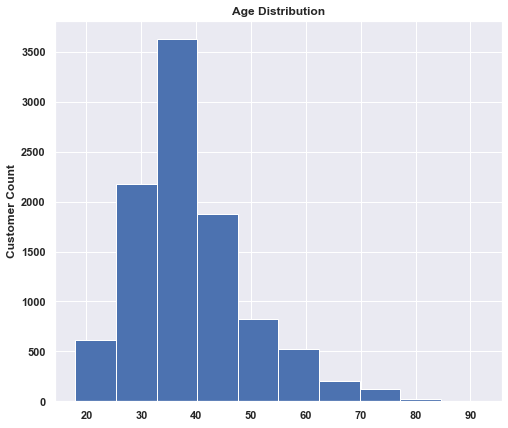

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


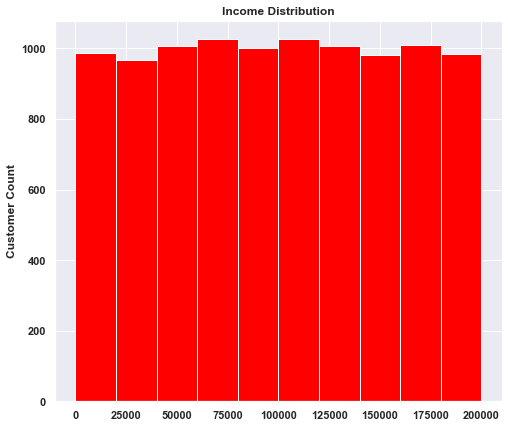

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: Income, dtype: float64


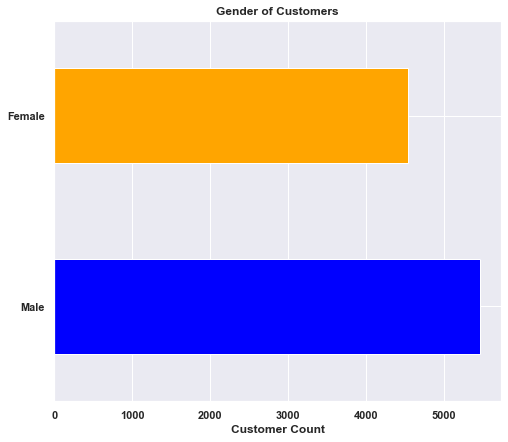

Male      5457
Female    4543
Name: Gender, dtype: int64


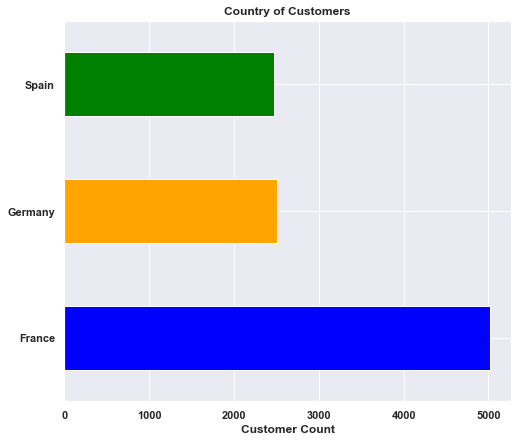

France     5014
Germany    2509
Spain      2477
Name: Country, dtype: int64


In [24]:
my_colors = ['blue', 'orange', 'green', 'red']

### Age of Customers ###
plt.hist(bank['Age'])
plt.ylabel('Customer Count')
plt.title('Age Distribution', fontweight='bold')
plt.show()
print(bank['Age'].describe())

### Income of Customers ###
plt.hist(bank['Income'], color='red')
plt.ylabel('Customer Count')
plt.title('Income Distribution', fontweight='bold')
plt.show()
print(bank['Income'].describe())

### Gender of Customers ###
bank['Gender'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Gender of Customers Distribution', fontweight='bold')
plt.xlabel('Customer Count')
plt.show()
print(bank['Gender'].value_counts())

### Country ###
bank['Country'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Country of Customers Distribution', fontweight='bold')
plt.xlabel('Customer Count')
plt.show()
print(bank['Country'].value_counts())

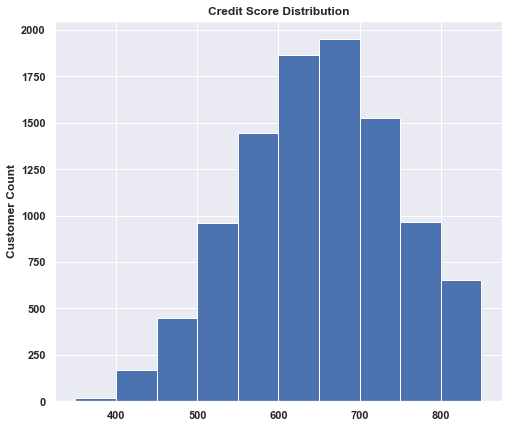

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: Credit_Score, dtype: float64


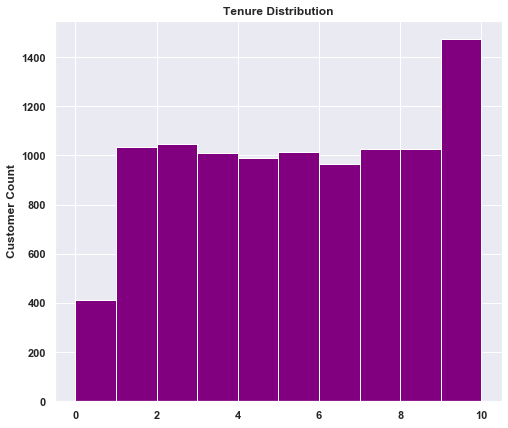

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


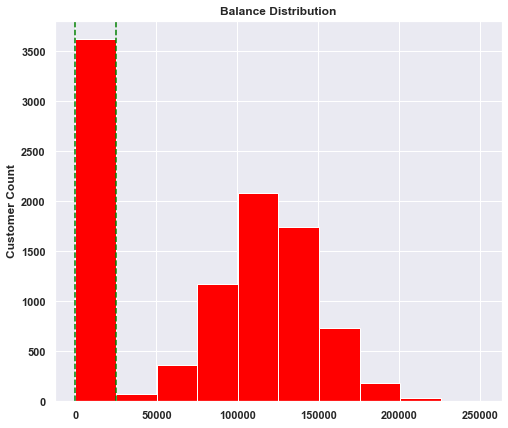

Those within the vertical green lines respresent those with no bank balance. These customers have less reason to be attached to the bank compared to those with high balance and are more likely to churn (we will look to see if the data backs this null hypothesis later) 

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


In [39]:
### Credit of Customers ###
plt.hist(bank['Credit_Score'])
plt.ylabel('Customer Count')
plt.title('Credit Score Distribution', fontweight='bold')
plt.show()
print(bank['Credit_Score'].describe())

### Tenure of Customers ###
plt.hist(bank['Tenure'], color='purple')
plt.ylabel('Customer Count')
plt.title('Tenure Distribution', fontweight='bold')
plt.show()
print(bank['Tenure'].describe())

### Balance of Customers ###
plt.hist(bank['Balance'], color='red')
plt.ylabel('Customer Count')
plt.title('Balance Distribution', fontweight='bold')
plt.axvline(x = 0, color='green', linestyle='--')
plt.axvline(x = 25000, color='green', linestyle='--')
plt.show()
print('Customers within the vertical green lines respresent those with no bank balance. These customers have less reason to be attached to the bank compared to those with high balance and are more likely to churn (we will look to see if the data backs this null hypothesis later)', '\n')
print(bank['Balance'].describe())

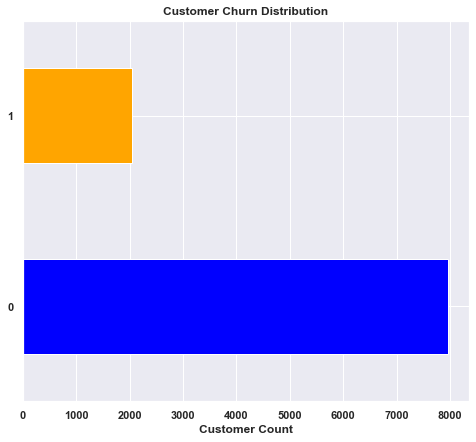

0    7963
1    2037
Name: Churn, dtype: int64


In [40]:
### Viewing the number of customers who churned or not ###
bank['Churn'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Customer Churn Distribution', fontweight='bold')
plt.xlabel('Customer Count')
plt.show()
print(bank['Churn'].value_counts())

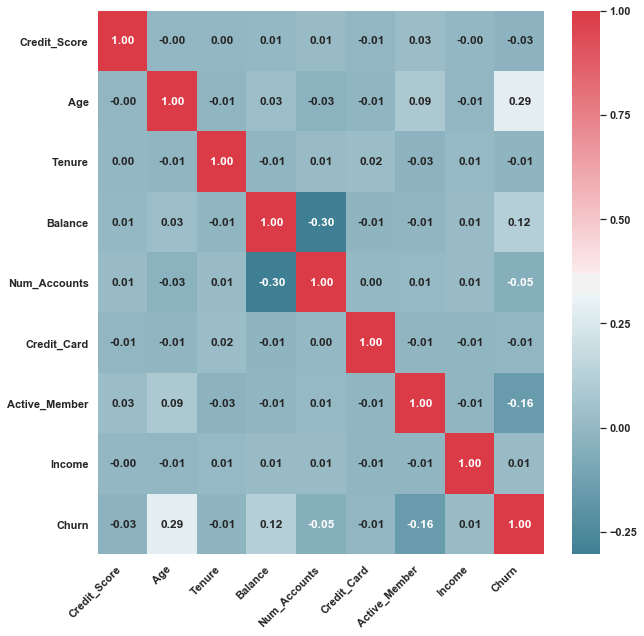

In [43]:
### Correlation Matrix ###
corr = newbank.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
plt.show()